# **Teachnook Machine Learning Major Project** 

Submitted By:
Harshitha Devina Anto

**Dataset: https://archive.ics.uci.edu/dataset/183/communities+and+crime**

# MULTI LINEAR REGRESSION

- The variable that we want to predict is known as the dependent variable
- The variables we use to predict the value of the dependent variable are known as independent or explanatory variables.
- Multi Linear Regression Equation
 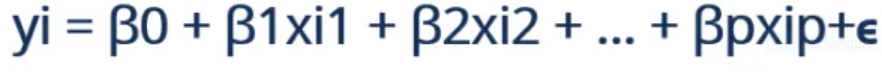


yi​ is the dependent or predicted variable

β0 is the y-intercept, i.e., the value of y when both xi and x2 are 0.

β1 and β2 are the regression coefficients representing the change in y relative 
to a one-unit change in xi1 and xi2, respectively.

βp is the slope coefficient for each independent variable

ϵ is the model’s random error (residual) term.

Multi linear regression is done when there exists more than 1 feature where relationship between two or more independent variables and one dependent variable is done.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

**Dataset: https://archive.ics.uci.edu/dataset/183/communities+and+crime**

In [6]:
train_data = pd.read_csv('/content/crime_train.csv')
train_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,1,14985,2.56,16.55,34.42,22.54,10.13,0,0.0,35545,...,23.3,13.5,0,0,3.32,60.94,47.28,66.65,82.41,428.64
1,2,30843,2.83,15.45,35.12,18.14,4.70,0,0.0,32033,...,21.6,10.9,68,41,4.98,25.24,28.17,52.73,59.20,742.54
2,3,74991,2.52,10.48,20.43,9.11,20.68,73342,97.8,31177,...,23.6,11.9,0,0,6.51,13.69,34.49,60.88,66.97,303.72
3,4,45061,2.44,10.59,24.97,11.61,16.34,45061,100.0,39822,...,24.0,16.3,0,1,13.13,67.79,65.19,84.28,91.32,373.88
4,5,12863,2.45,12.02,22.51,10.49,18.46,0,0.0,23044,...,16.0,11.7,0,0,1.08,80.22,53.17,86.56,93.15,108.07


In [7]:
test_data = pd.read_csv('/content/crime_test.csv')
test_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,1,11874,2.11,10.54,30.87,14.08,8.16,11874,100.0,30141,...,22.9,19.2,11.4,2,1,7.02,51.78,39.89,75.63,83.39
1,2,14143,2.68,21.01,33.35,21.95,14.55,0,0.0,23886,...,30.5,21.0,14.9,0,0,2.35,75.91,51.79,72.20,88.40
2,3,34882,2.32,12.56,21.79,11.29,19.51,34881,100.0,21053,...,26.5,16.9,11.8,0,9,1.61,74.43,62.60,86.35,90.85
3,4,29885,3.53,20.10,34.33,18.31,8.18,29885,100.0,18956,...,26.2,19.8,13.8,0,0,18.46,68.90,52.42,83.01,90.76
4,5,935933,2.86,15.89,30.35,14.98,9.50,935927,100.0,23584,...,25.3,20.9,12.7,698,44,9.35,69.25,51.62,83.78,90.95


**Preprocessing**

In [8]:
training_data = train_data.drop(['ID'], axis=1)
training_data.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,14985,2.56,16.55,34.42,22.54,10.13,0,0.0,35545,81.47,...,23.3,13.5,0,0,3.32,60.94,47.28,66.65,82.41,428.64
1,30843,2.83,15.45,35.12,18.14,4.70,0,0.0,32033,88.31,...,21.6,10.9,68,41,4.98,25.24,28.17,52.73,59.20,742.54
2,74991,2.52,10.48,20.43,9.11,20.68,73342,97.8,31177,68.06,...,23.6,11.9,0,0,6.51,13.69,34.49,60.88,66.97,303.72
3,45061,2.44,10.59,24.97,11.61,16.34,45061,100.0,39822,77.19,...,24.0,16.3,0,1,13.13,67.79,65.19,84.28,91.32,373.88
4,12863,2.45,12.02,22.51,10.49,18.46,0,0.0,23044,71.15,...,16.0,11.7,0,0,1.08,80.22,53.17,86.56,93.15,108.07


In [9]:
testing_data = test_data.drop(['ID'], axis=1)
testing_data.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11874,2.11,10.54,30.87,14.08,8.16,11874,100.0,30141,84.74,...,22.9,19.2,11.4,2,1,7.02,51.78,39.89,75.63,83.39
1,14143,2.68,21.01,33.35,21.95,14.55,0,0.0,23886,72.48,...,30.5,21.0,14.9,0,0,2.35,75.91,51.79,72.20,88.40
2,34882,2.32,12.56,21.79,11.29,19.51,34881,100.0,21053,64.58,...,26.5,16.9,11.8,0,9,1.61,74.43,62.60,86.35,90.85
3,29885,3.53,20.10,34.33,18.31,8.18,29885,100.0,18956,78.48,...,26.2,19.8,13.8,0,0,18.46,68.90,52.42,83.01,90.76
4,935933,2.86,15.89,30.35,14.98,9.50,935927,100.0,23584,79.02,...,25.3,20.9,12.7,698,44,9.35,69.25,51.62,83.78,90.95


**Exploratory Data Analysis**

    • Percentage of households different types of income in 1989
    
        o -- pctWWage: percentage of households with wage or salary income in 1989 (numeric - decimal)
        o -- pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal)
        o -- pctWInvInc: percentage of households with investment / rent income in 1989 (numeric - decimal)
        o -- pctWSocSec: percentage of households with social security income in 1989 (numeric - decimal)
        o -- pctWPubAsst: percentage of households with public assistance income in 1989 (numeric - decimal)
        o -- pctWRetire: percentage of households with retirement income in 1989 (numeric - decimal)
        


In [19]:
 import seaborn as sns

In [23]:
training_data

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,14985,2.56,16.55,34.42,22.54,10.13,0,0.0,35545,81.47,...,23.3,13.5,0,0,3.32,60.94,47.28,66.65,82.41,428.64
1,30843,2.83,15.45,35.12,18.14,4.70,0,0.0,32033,88.31,...,21.6,10.9,68,41,4.98,25.24,28.17,52.73,59.20,742.54
2,74991,2.52,10.48,20.43,9.11,20.68,73342,97.8,31177,68.06,...,23.6,11.9,0,0,6.51,13.69,34.49,60.88,66.97,303.72
3,45061,2.44,10.59,24.97,11.61,16.34,45061,100.0,39822,77.19,...,24.0,16.3,0,1,13.13,67.79,65.19,84.28,91.32,373.88
4,12863,2.45,12.02,22.51,10.49,18.46,0,0.0,23044,71.15,...,16.0,11.7,0,0,1.08,80.22,53.17,86.56,93.15,108.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,372242,2.58,12.88,27.02,12.96,10.63,372242,100.0,27095,72.09,...,25.3,12.8,431,303,19.75,45.34,48.53,79.89,89.05,2601.60
1591,49389,2.56,11.17,22.59,10.65,18.16,49389,100.0,41745,74.97,...,22.4,15.0,3,3,6.16,68.75,69.46,92.04,95.25,199.45
1592,131591,2.62,12.40,28.85,13.61,11.28,131591,100.0,35103,78.21,...,25.1,11.8,220,14,27.53,39.13,45.87,80.95,84.68,1280.74
1593,165121,2.36,16.31,32.25,18.75,13.77,165121,100.0,19923,72.35,...,20.4,13.6,354,130,1.98,69.57,47.86,77.77,87.92,1693.42


In [24]:
training_data['pctWWage']

0       81.47
1       88.31
2       68.06
3       77.19
4       71.15
        ...  
1590    72.09
1591    74.97
1592    78.21
1593    72.35
1594    75.99
Name: pctWWage, Length: 1595, dtype: float64

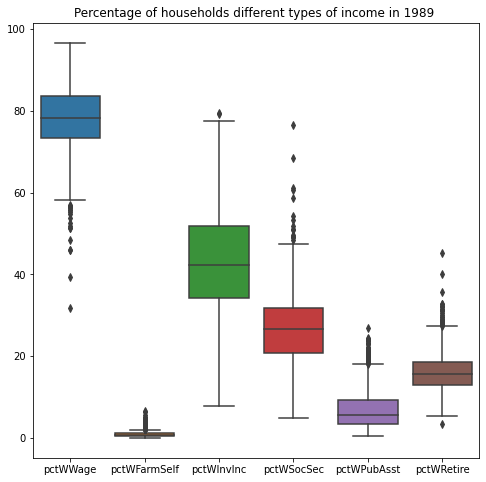

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cols = training_data[['pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire']]

xticklables = ['pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire']
sns.boxplot(data=cols)
ax.set(title="Percentage of households different types of income in 1989 ")
ax.set_xticklabels(xticklables)
plt.show()


In [64]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb']
values = training_data[['PersPerOwnOccHous']]
labels = ['PersPerOwnOccHous'] 

ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted) vs PersPerOwnOccHous PersPerOwnOccHous: mean persons per owner occupied household (numeric - decimal)


<BarContainer object of 1595 artists>

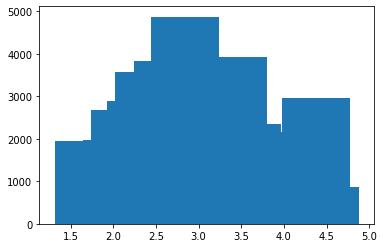

In [65]:

import numpy as np
import matplotlib.pyplot as plt
plt.bar(training_data['PersPerOwnOccHous'], training_data['ViolentCrimesPerPop'])

PctSpeakEnglOnly: percent of people who speak only English (numeric - decimal)

PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal)


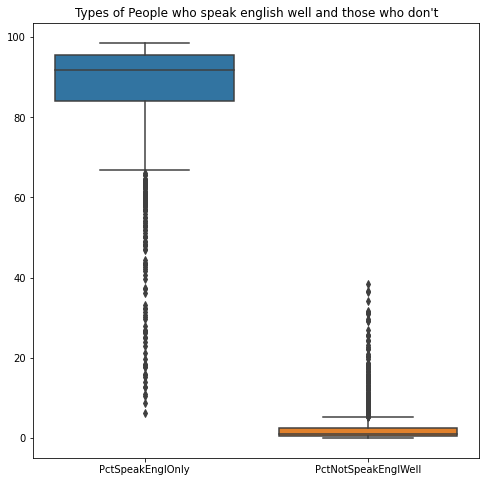

In [70]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cols = training_data[['PctSpeakEnglOnly','PctNotSpeakEnglWell']]

xticklables = ['PctSpeakEnglOnly','PctNotSpeakEnglWell']
sns.boxplot(data=cols)
ax.set(title="Types of People who speak english well and those who don't")
ax.set_xticklabels(xticklables)
plt.show()


**Initialising X_train, y_train, X_test**

In [10]:
y_train = training_data['ViolentCrimesPerPop']

In [11]:
X_train = training_data.drop(['ViolentCrimesPerPop'], axis=1)

In [12]:
X_test = testing_data

**Multi Linear Regression Model**

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Apply trained model to make prediction (on test set)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([ 7.74083197e+02,  3.66434629e+02,  6.34207067e+02,  8.13230393e+02,
        1.02856685e+03,  2.14019941e+02,  1.14682448e+03,  1.43556565e+02,
        1.40067431e+03,  8.85117389e+02,  2.38993146e+02,  3.91039235e+02,
        1.04891330e+02,  2.72957785e+02,  1.05334648e+03,  1.30651053e+03,
        7.78314315e+02,  3.04899384e+02,  1.36312440e+03,  1.62038631e+03,
        3.56694104e+02,  4.08799532e+02,  1.06180015e+03,  9.17911375e+01,
        9.09218622e+02,  1.81715385e+02,  1.05451816e+03,  6.42015280e+02,
        3.98739407e+02,  3.16383772e+02,  2.37191077e+02,  2.94315483e+02,
        1.77102237e+02,  4.58489407e+02,  3.86055520e+02,  5.20447896e+01,
        1.29208105e+02,  2.93901493e+02,  9.53618132e+02,  1.54020851e+00,
       -8.43047519e+01,  1.47643391e+03,  1.72991284e+02,  4.15353367e+02,
        1.05275001e+03,  7.07897555e+01,  5.99164576e+02,  1.60693365e+02,
        8.04174947e+02,  2.07094458e+02,  8.22130304e+02,  4.28374903e+02,
        9.56457407e+02,  

**Model performance**

In [15]:
print("Coefficients of features: \n", model.coef_)
print("\nIntercept: ", model.intercept_)


Coefficients of features: 
 [ 7.14919936e-04  1.23800100e+01 -8.28000652e+00 -3.58840708e+01
  3.34549393e+01 -1.30305450e+01 -8.54932516e-04  1.41109567e+00
 -2.27552750e-02 -7.00821090e+00  2.95727019e+01 -6.67902639e+00
  1.15458646e+01  8.82161707e+00 -8.30115048e+00  1.83594413e-02
 -4.98509797e-03 -2.78001000e-03 -2.94824284e+00 -1.43136672e+01
  4.97783566e+00  1.75724402e+00 -1.30374690e+00  1.20918533e+01
 -4.06281211e+00  2.15366190e+00 -4.99653775e-01  4.22547268e+00
  2.00271997e+02 -2.07777399e+00  1.43816056e+02 -3.32259909e+02
 -4.05926926e+02 -2.43207388e+00 -1.93158681e+01  2.92604083e+00
 -7.24481971e-01  3.29895767e+00 -1.01925764e+01 -1.42096878e-03
  5.64015457e+01  8.53412360e-04  2.72361194e+00 -1.48151566e+00
 -1.37678352e-03  1.12487361e+00 -4.05246604e+01 -1.47028063e+01
  1.30649975e+01  6.46421199e-01  2.32781012e+00 -1.30391028e+01
  4.72734257e+01 -7.20762077e+01  3.65621264e+02  6.07187018e+02
 -3.58006983e+02 -5.18526869e+01  2.25870300e+01  3.33424415e+

**Accuracy**

In [16]:
print("Accuracy = ", model.score(X_test, y_pred))

Accuracy =  1.0


**To print output in new csv file**

A  new csv is created with the predicted values for corresponding columns, listed with 
filename given. View the predicted values by opening the new csv file.

In [17]:
id = test_data['ID']

In [18]:
import csv
output = open("multilinear_regression.csv", 'w')
sub_file = csv.writer(output)
sub_file.writerow(['ID', 'ViolentCrimesPerPop'])

for i in range(0, len(y_pred)):
  sub_file.writerow([str(id[i]), str(y_pred[i])])

output.close()